## Observations and Insights 

In [ ]:
#Observations:

# 1. There is a strong positive correlation between mouse weight and average tumor volume size (a correlation of 0.84) . 

# 2. Using mouse s185 as an example, the Capomulin treatment significantly reduced the tumor volume over time. 

# 3. Capumolin and Ramicane performed significantly better at reducing tumor sizes vs. Infubinol and Ceftamin.

# 4. The number of male or female rats in this study is nearly 50/50 (49.6% female and 50.4% male).

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results_df = pd.merge(mouse_metadata, study_results, how = 'outer', on= 'Mouse ID')
# Display the data table for preview
mouse_study_results_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [123]:
# Checking the number of mice.
mouse_count = mouse_study_results_df['Mouse ID'].value_counts()
mouse_count

g989    13
j296    10
p438    10
c264    10
l509    10
        ..
h428     1
n482     1
x336     1
o848     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [124]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_study_results_df["Mouse ID"].value_counts() > 10 
print(mouse_duplicates) #found g989 to be duplicated

g989     True
j296    False
p438    False
c264    False
l509    False
        ...  
h428    False
n482    False
x336    False
o848    False
t573    False
Name: Mouse ID, Length: 249, dtype: bool


In [125]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_study_results_df.set_index("Mouse ID")
duplicate_mouse = duplicate_mouse_df.loc["g989", :]
duplicate_mouse


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = duplicate_mouse_df.drop("g989", axis = 0)
new_clean_data = clean_data_df.reset_index()
new_clean_data.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [127]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = new_clean_data.groupby("Mouse ID")
len(new_mouse_count) # gives result of 248 so yes it was deleted 

248

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_array = new_clean_data["Drug Regimen"].unique() # gives results that the regimens are: ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

tumor_volume_mean = pd.DataFrame(new_clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"])
tumor_volume_mean.head(len(regimen_array))

tumor_volume_median = pd.DataFrame(new_clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"])
tumor_volume_median.head(len(regimen_array))

tumor_volume_variance = pd.DataFrame(new_clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"])
tumor_volume_variance.head(len(regimen_array))

tumor_volume_std = pd.DataFrame(new_clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"])
tumor_volume_std.head(len(regimen_array))

tumor_std_error = pd.DataFrame(new_clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"])
tumor_std_error.head(len(regimen_array))

frames = [tumor_volume_mean,tumor_volume_median, tumor_volume_variance, tumor_volume_std, tumor_std_error]

regimen_summary = pd.concat(frames, axis=1)
regimen_summary.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Standard Error']
regimen_summary.head(len(regimen_array))




,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

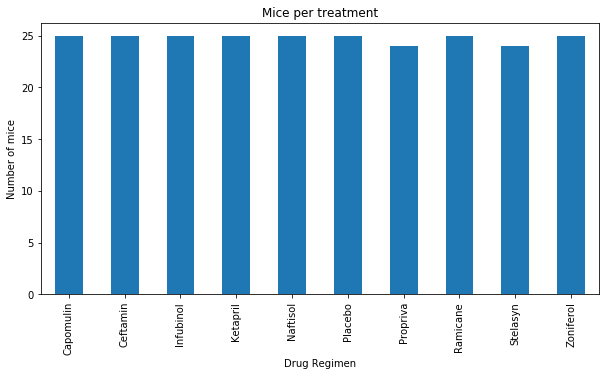

<Figure size 432x288 with 0 Axes>

In [130]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_regimen = new_clean_data.groupby("Drug Regimen")["Mouse ID"].nunique()

mice_per_regimen.plot(kind = "bar", figsize = (10, 5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Mice per treatment")
plt.show()
plt.tight_layout()
                      


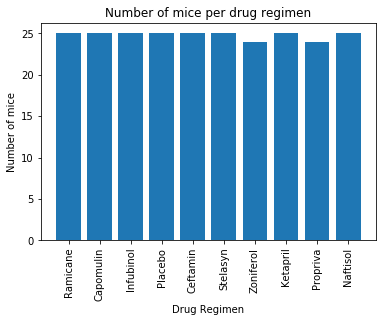

<Figure size 432x288 with 0 Axes>

In [131]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = new_clean_data["Drug Regimen"].unique()
y_axis = new_clean_data.groupby("Drug Regimen")["Mouse ID"].nunique()

plt.bar(regimen_array, y_axis, align = 'center')
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Number of mice per drug regimen")
plt.show()
plt.tight_layout()

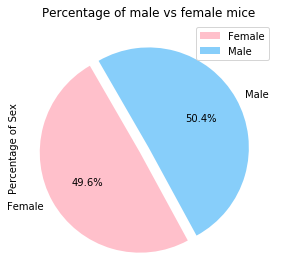

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_mice_gender = new_clean_data.groupby(["Mouse ID", "Sex"])

mouse_gender_df = pd.DataFrame(grouped_mice_gender.size())

mouse_genders = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_genders.columns = ["Total Count"]

mouse_genders["Percentage of Sex"] = (100*(mouse_genders["Total Count"]/mouse_genders["Total Count"].sum()))
mouse_genders

colors = ['pink', 'lightskyblue']
explode = (0.1,0)
plot = mouse_genders.plot.pie(y = "Percentage of Sex", colors = colors, explode = explode, startangle = 120, autopct = "%1.1f%%")
plt.title("Percentage of male vs female mice")
plt.tight_layout()

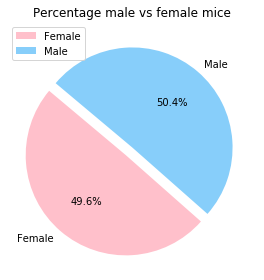

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [mouse_genders.loc["Female"].values[1],mouse_genders.loc["Male"].values[1]]
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = "%1.1f%%", startangle = 140)
plt.title("Percentage male vs female mice")
plt.legend(labels, loc = 'upper left')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
#Capomulin 
cap_df = new_clean_data.loc[new_clean_data["Drug Regimen"] == "Capomulin", :]
ram_df = new_clean_data.loc[new_clean_data["Drug Regimen"] == "Ramicane", :]
inf_df = new_clean_data.loc[new_clean_data["Drug Regimen"] == "Infubinol", :]
cef_df = new_clean_data.loc[new_clean_data["Drug Regimen"] == "Ceftamin", :]
caplast = cap_df.groupby("Mouse ID").max()["Timepoint"]
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, new_clean_data, on = ("Mouse ID", "Timepoint"), how = "left")
caplastmerge.head(10)

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([0.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Outliers for Capomulin are values below {lower_bound} and above {upper_bound}")

#Ramicane

ramlast = ram_df.groupby("Mouse ID").max()["Timepoint"]
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, new_clean_data, on = ("Mouse ID", "Timepoint"), how = "left")
ramlastmerge.head(10)

tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([0.25, .5, .75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

print(f"Outliers for Ramicane are values below {lower_bound2} and above {upper_bound2}")

#Infubinol

inflast = inf_df.groupby("Mouse ID").max()["Timepoint"]
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, new_clean_data, on = ("Mouse ID", "Timepoint"), how = "left")
inflastmerge.head(10)

tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([0.25, .5, .75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

print(f"Outliers for Infubinol are values below {lower_bound3} and above {upper_bound3}")

#Ceftamin
ceflast = cef_df.groupby("Mouse ID").max()["Timepoint"]
ceflastvol = pd.DataFrame(ceflast)
ceflastmerge = pd.merge(ceflastvol, new_clean_data, on = ("Mouse ID", "Timepoint"), how = "left")
ceflastmerge.head(10)

tumors4 = ceflastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([0.25, .5, .75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)

print(f"Outliers for Ceftamin are values below {lower_bound4} and above {upper_bound4}")


Outliers for Capomulin are values below 20.70456164999999 and above 51.83201549
Outliers for Ramicane are values below 17.912664470000003 and above 54.30681135
Outliers for Infubinol are values below 36.83290494999999 and above 82.74144559000001
Outliers for Ceftamin are values below 25.355449580000002 and above 87.66645829999999


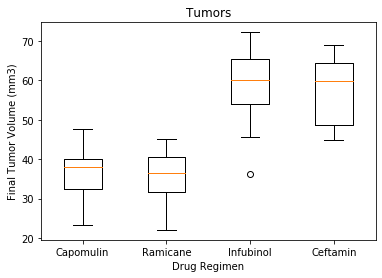

In [135]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [tumors, tumors2, tumors3, tumors4]
fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(data_to_plot, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

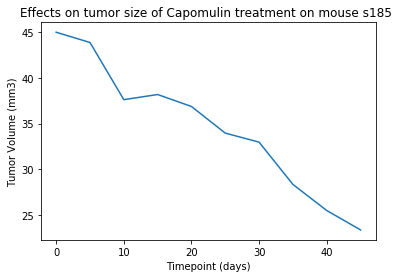

<Figure size 432x288 with 0 Axes>

In [136]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_df.head(10) #head shows Mouse ID s185 so have chosen this one 

mouse_tumor_journey = cap_df.loc[cap_df["Mouse ID"] == "s185", :]
mouse_tumor_journey.head(10)

xaxislineplot = mouse_tumor_journey["Timepoint"]
yaxislineplot = mouse_tumor_journey["Tumor Volume (mm3)"]
plt.plot(xaxislineplot, yaxislineplot)
plt.title("Effects on tumor size of Capomulin treatment on mouse s185 ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

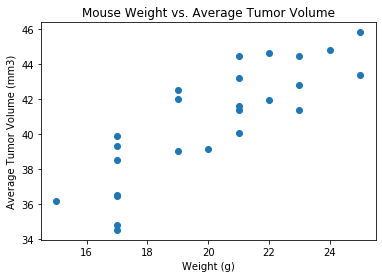

<Figure size 432x288 with 0 Axes>

In [137]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg = cap_df.groupby(["Mouse ID"]).mean()
cap_avg.head()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()
plt.tight_layout()

## Correlation and Regression

In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Correlation
correlation =  st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")

The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694717


In [148]:
#Linear Regression
linear_regression = st.linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
print (linear_regression) #note that rvalue is similar to correlation efficient

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)


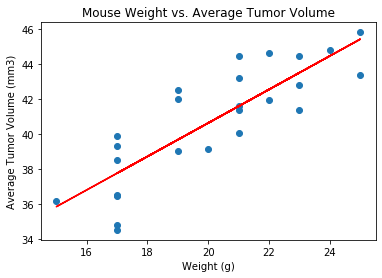

<Figure size 432x288 with 0 Axes>

In [147]:
#PLot to show linear regression on chart 
slope = linear_regression[0]
intercept = linear_regression[1]
y_values = (cap_avg["Weight (g)"]*slope + intercept)
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"], y_values, color = 'r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()
plt.tight_layout()